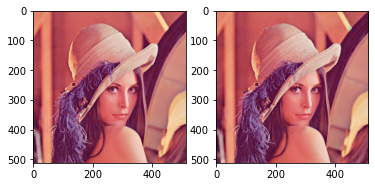

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

img = Image.open('D:\JupyterFile\Lenna.png')

#RGB2LAB
r,g,b = img.split()
r = np.array(r)
g = np.array(g)
b = np.array(b)
r = r/255
g = g/255
b = b/255

x = r * 0.412453 + g * 0.357580 + b * 0.180423
y = r * 0.212671 + g * 0.715160 + b * 0.072169
z = r * 0.019334 + g * 0.119193 + b * 0.950227
xyz = np.array([x/0.95047,y,z/1.08883])

xyz = np.where(xyz > 0.008856,np.power(xyz,1/3),7.787037*xyz+0.137931)
L = 116 * xyz[1] - 16
a = 500 * (xyz[0] - xyz[1])
b = 200 * (xyz[1] - xyz[2])
Lab = np.array([L,a,b])
Lab = np.transpose(Lab,(1,2,0))
Lab = np.int8(np.rint(Lab))

#LAB2RGB
Lab = np.transpose(Lab,(2,0,1))
fy = (Lab[0] + 16.0) / 116.0
fx = Lab[1] / 500.0 + fy
fz = fy - Lab[2] / 200.0
fxyz = np.array([fx,fy,fz])

fxyz = np.where(fxyz > 0.206893,np.power(fxyz,3),(fxyz-0.137931)/7.787037)
fxyz = np.array([fxyz[0]*0.95047,fxyz[1],fxyz[2]*1.08883])

fr = fxyz[0] * 3.240479 - fxyz[1] * 1.537150 - fxyz[2] * 0.498535
fg = fxyz[0] * -0.969256 + fxyz[1] * 1.8760108 + fxyz[2] * 0.041556
fb = fxyz[0] * 0.055648 - fxyz[1] * 0.2040259 + fxyz[2] * 1.057311

frgb = np.array([fr,fg,fb])
frgb = np.transpose(frgb,(1,2,0))
frgb = frgb * 255
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(np.uint8(frgb))